# Simple Audio Processing

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile as wav
import wave

## File input

In [62]:
def wav_read(filename):
    """Return 1D NumPy array of wave-formatted audio data denoted by filename.
    
    Input should be a string containing the path to a wave-formatted audio file.
    File should be uncompressed 16-bit."""
    sample_rate, data_2d = wav.read(filename)
    data_1d = [val for val, _ in data_2d]
    return np.array(data_1d)

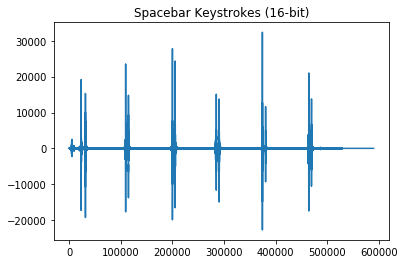

In [64]:
sound_file = 'datasets/spacebar-6x-16bit.wav'
spacebar_6x = wav_read(sound_file)

%matplotlib inline
plt.title('Spacebar Keystrokes (16-bit)')
plt.plot(spacebar_6x)
plt.show()

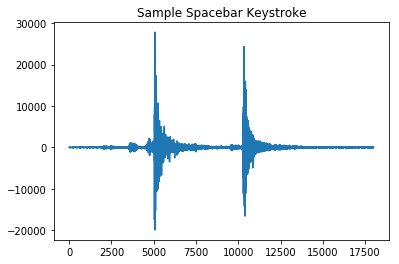

In [65]:
sample_keystroke = spacebar_6x[195000:213000]
plt.title('Sample Spacebar Keystroke')
plt.plot(sample_keystroke)
plt.show()

## Keystroke extraction

### Calculating Silence Threshold

In [66]:
def stats(array):
    """Return a dictionary containing relevant statistical data.
    
    :type array -- NumPy array
    :rtype dict
    """
    return {
        "mean": np.mean(array),
        "median": np.median(array),
        "max": np.amax(array),
        "min": np.amin(array),
        "standard dev": np.std(array),
    }

#### Test 1 - Silence followed by 1 keystroke

mean = -0.46442333333333335
median = 0.0
max = 104
min = -104
standard dev = 22.414488044583774


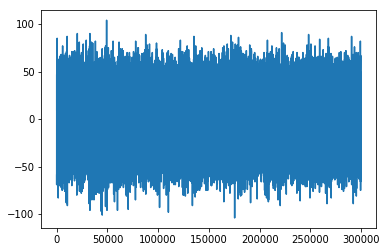

In [68]:
silence1_raw = wav_read('datasets/spacebar-1x-withsilence.wav')
silence1 = silence_raw[:300000]

silence1_stats = stats(silence1)
for stat in silence1_stats:
    print(f"{stat} = {silence1_stats[stat]}")
    
plt.plot(silence1)
plt.show()

#### Test 2 - Silence followed by several keystrokes (same key, consistent pace)

mean = -0.46246
median = 0.0
max = 116
min = -121
standard dev = 24.353047531710143


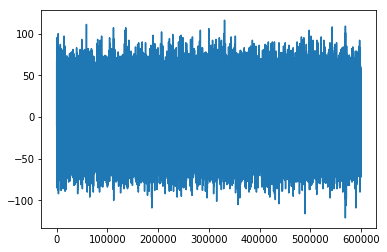

In [36]:
silence2_raw = wav_read('datasets/a-16x-withsilence.wav')
silence2 = silence2_raw[:600000]

silence2_stats = stats(silence2)
for stat in silence2_stats:
    print(f"{stat} = {silence2_stats[stat]}")
    
plt.plot(silence2)
plt.show()

#### Test 3 - Silence followed by several keystrokes (different keys, inconsistent pace)

mean = -0.47350933333333334
median = -1.0
max = 102
min = -101
standard dev = 20.25439809632909


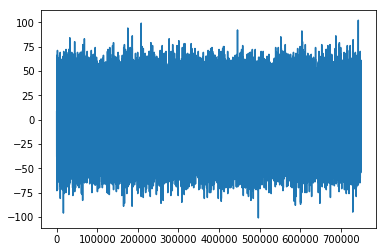

In [44]:
silence3_raw = wav_read('datasets/random-withsilence.wav')
silence3 = silence3_raw[:750000]

silence3_stats = stats(silence3)
for stat in silence3_stats:
    print(f"{stat} = {silence3_stats[stat]}")
plt.plot(silence3)
plt.show()

#### Results

In [60]:
results = pd.DataFrame([silence1_stats, silence2_stats, silence3_stats], 
                       index=['Test 1', 'Test 2', 'Test 3'])
results

,max,mean,median,min,standard dev
Test 1,104,-0.464423,0.0,-104,22.414488
Test 2,116,-0.462460,0.0,-121,24.353048
Test 3,102,-0.473509,-1.0,-101,20.254398


### Extracting keystrokes

In [8]:
def extract_keystrokes(sound_data):
    """Return array of arrays denoting each keystroke detected in the sound_data.
    
    Each keystroke consists of a push peak (touch peak and hit peak) and a release peak.
    The keystroke audio should begin right as the push peak begins.
    
    :type sound_file  -- NumPy array denoting input sound clip
    :type sample_rate -- integer denoting sample rate (samples per second)
    :rtype            -- NumPy array of NumPy arrays
    """
    silence_threshold  = 2500  # values less than this are considered random noise
    keystroke_duration = 0.17  # seconds
    sample_rate        = 44100 # Hz
    sample_length      = int(sample_rate * keystroke_duration)
    
    keystrokes = []
    i = 0
    while i < len(sound_data):
        if abs(sound_data[i]) > silence_threshold:
            sample_start, sample_end = i, i + sample_length
            keystroke = sound_data[sample_start:sample_end]
            keystrokes.append(keystroke)
            i = sample_end - 1
        i += 1
    return np.array(keystrokes)

#### Testing

In [9]:
def test_extract_keystrokes(data, expect):
    """Test if extract_keystrokes() extracts the correct number of keystrokes."""
    keystrokes = extract_keystrokes(data)
    actual = len(keystrokes)
    assert expect == actual, f"Detected keystrokes mismatch. Found {actual} instead of {expect}."
    print("Number of keystrokes matched!")
    
    
test_set = {
    ''
}

def run_extract_keystrokes_tests(test_set):
    for filename in test_set:
        wav_file = wav_read(filename)
        expected = test_set[filename]
        test_extract_keystrokes(wav_file, expected)

Number of keystrokes matched!
Number of keystrokes matched!


AssertionError: Detected keystrokes mismatch. Found 124 instead of 100.

In [ ]:
keystrokes = extract_keystrokes(spacebar_training)
for keystroke in keystrokes:
    plt.plot(keystroke)
    plt.show()

## Collecting training data